# Polynomial Regression and Nonlinear Transformations

We continue to build our regression repetoire with polynomial and nonlinear transformations.

## What will we accomplish

In this notebook we will:
- Introduce polynomial regression,
- Review interaction terms between continuous features and
- Discuss adding in nonlinear transformations of your features

In [1]:
## import packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from seaborn import set_style

set_style("whitegrid")

## Adding in polynomial transformations

We will demonstrate polynomial regression by working through a sample data set.

In [2]:
df = pd.read_csv("../../data/poly.csv")

In [3]:
df.head()

,x1,x2,y
0,0.343776,-0.640469,7.781092
1,-1.277124,2.729603,-26.550042
2,2.855048,-1.570039,21.873791
3,-1.728705,-1.037708,16.462940
4,0.688129,2.654048,-20.104023


<i>Note: we will not be doing train test splits, cross-validation or a validation set for this data set because we will not be comparing predictive models. The point of this notebook is to illustrate polynomial regression and nonlinear transformations, not model selection.</i>

Let's make a plot to explore any potential relationships between `x1`, `x2` and `y`.

To do this we will use `pandas` `scatter_matrix` function, <a href="https://pandas.pydata.org/docs/reference/api/pandas.plotting.scatter_matrix.html">https://pandas.pydata.org/docs/reference/api/pandas.plotting.scatter_matrix.html</a>.

In [4]:
from pandas.plotting import scatter_matrix

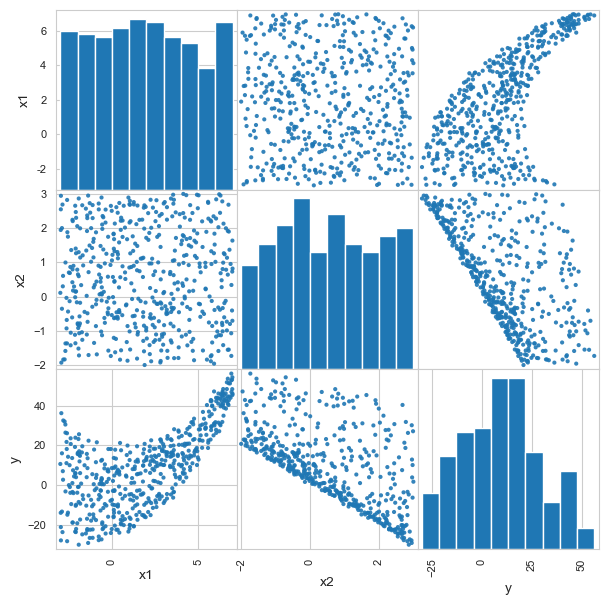

In [5]:
scatter_matrix(df, figsize=(7,7), alpha=.9)

plt.show()

Looking at the `y` row we can see that while there seems to be a linear relationship between `y` and `x2`, there is clearly not one between `y` and `x1`. Recalling our old algebra courses, we recognize that there does appear to be something like a quadratic ($y \propto x_1^2$) or quartic ($y \propto x_1^4$) relationship. While these features are not present in the original data set, we can easily create them.

In [6]:
## make x1_sq here
df['x1_sq'] = df['x1']**2

We can re-examine our scatter matrix.

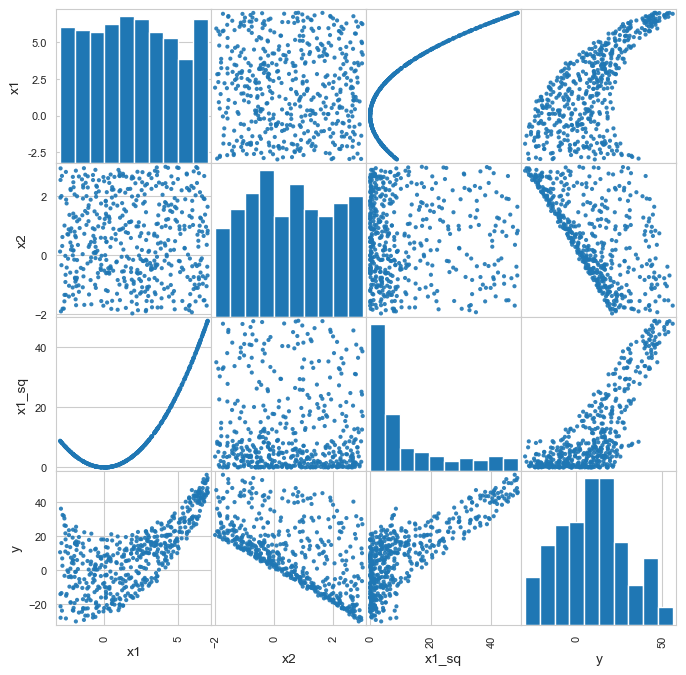

In [7]:
scatter_matrix(df[['x1','x2','x1_sq','y']], 
               figsize=(8,8), 
               alpha=.9)

plt.show()

Much more of a linear relationship. Let's fit the following model:

$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_1^2 + \beta_3 x_2 + \epsilon
$$

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
## Fit the model
reg = LinearRegression(copy_X=True)
reg.fit(df[['x1','x1_sq','x2']].values, df['y'])

LinearRegression()

Now we have not done this yet, but one trick when building a linear regression model is to look at the <i>residual plot</i>, where we plot our errors ($y - \hat{y}$) against our $y$ values. Recall that if our model closely approximates $y$ then we should have:
$$
y - \hat{y} \approx \epsilon.
$$

So if our model closely approximates $y$ we should expect to see a blob of points that fall uniformly around the horizontal axis. If we see points that clearly depart from such a pattern we know that our model is missing some input that could help explain or predict `y`.

<i>We will touch more on residual plots in a coming notebook</i>.

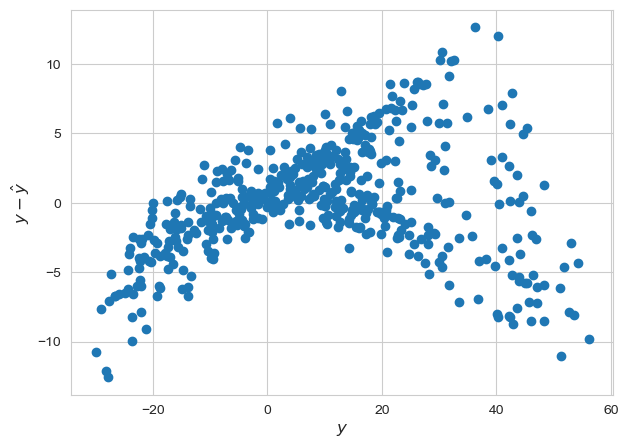

In [10]:
plt.figure(figsize=(7,5))

plt.scatter(df.y, df.y - reg.predict(df[['x1','x1_sq','x2']].values))

plt.xlabel("$y$", fontsize=12)
plt.ylabel("$y - \hat{y}$", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

This definitely does not look like a uniform band around the horizontal axis, which suggests we are missing an input into our model. In this setting, we do not have any other variables in our data set that we have left out of the modeling process. We could include additional powers of `x1`, but let's first try adding an <i>interaction</i> term between `x1` and `x2`. Remember that an interaction term between two variables just means that we multiply those variables. So the new model we will fit is:

$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_1^2 + \beta_3 x_2 + \beta_4 x_1 x_2 + \epsilon
$$

In [11]:
## First make x1x2
df['x1x2'] = df['x1']*df['x2']

In [12]:
reg = LinearRegression(copy_X=True)
reg.fit(df[['x1','x1_sq','x2','x1x2']].values, df['y'])

LinearRegression()

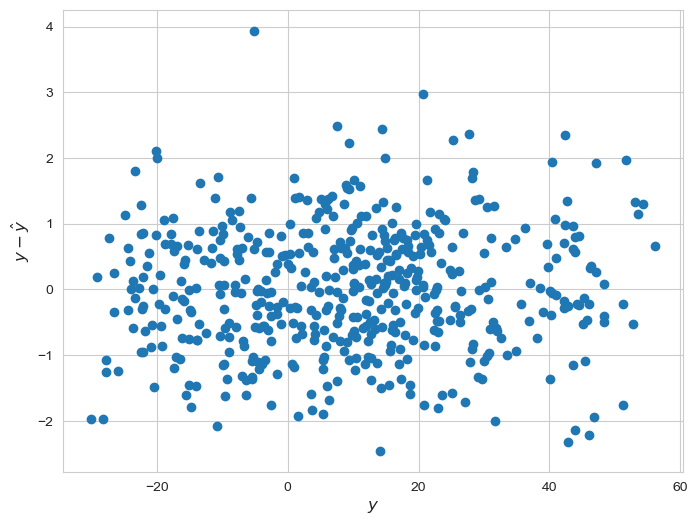

In [13]:
plt.figure(figsize=(8,6))

plt.scatter(df.y, df.y - reg.predict(df[['x1','x1_sq','x2','x1x2']].values))

plt.xlabel("$y$", fontsize=12)
plt.ylabel("$y - \hat{y} $", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

This is a much better plot.

Now I know this seems like a mystical process, and a common question I get is when do I know when to include an interaction term? Unfortunately there is not a silver bullet to finding the perfect model. Sometimes there is no algorithmic replacement to data exploration and playing around with different models.

### Respecting the hierarchy when modeling

Let's look at the coefficients on this  model.

In [14]:
reg.coef_

array([-0.05965082,  1.01366121, -9.93008964,  0.9663305 ])

If you notice the coefficient on $x_1$ is close to $0$ in the interaction term model. It may be tempting to remove this feature from the model especially if the true relationship was: 

$$ 
y = 2 + x_1^2 - 10 x_2 + x_1 x_2. 
$$ 

However, there is no way for you to know ahead of time what the true relationship is between the target and the features, if there was there'd be no need for regression.

To further illustrate this point, imagine the true relationship was such that: 

$$ 
y \propto x_1^2, 
$$ 

if we do not include $x_1$ in our model we are limiting ourselves to parabolas of the form 

$$ 
\beta_0 + \beta_1 x_1^2, 
$$ 

which leaves out a number of possible parabolas.

It is important to remember that anytime you make a model that includes a polynomial transformation you need to include all of the lesser powers as well. So with $x_1^2$ as the highest power you'd need to include $x_1$, with $x_1^3$ as the highest power you'd need to include $x_1^2$ and $x_1$, and so on for $x_1^n$.

This also holds for interaction terms. If you include $x_1 x_2$ you need to include both $x_1$ and $x_2$ as predictors as well.

## Nonlinear transformations

In addition to polynomial transformations, we could also include other transformations of our input data like $\sqrt{\bullet}$, $\log{(\bullet)}$, $\sin{(\bullet)}$, $e^\bullet$ or more.

You will work on an example problem using a nonlinear transformation in our problem session notebooks.

--------------------------

This notebook was written for the Erd&#337;s Institute C&#337;de Data Science Boot Camp by Matthew Osborne, Ph. D., 2023.

Any potential redistributors must seek and receive permission from Matthew Tyler Osborne, Ph.D. prior to redistribution. Redistribution of the material contained in this repository is conditional on acknowledgement of Matthew Tyler Osborne, Ph.D.'s original authorship and sponsorship of the Erdős Institute as subject to the license (see License.md)